In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats
import matplotlib.pyplot as plt

data = pd.read_csv("ElectrCons3w.txt", sep=r"\s+", engine="python")

for col in ['IM','OT','TS']:
    data[col] = data[col].astype('category')


In [3]:
model_full = ols('y ~ IM * OT * TS', data=data).fit()

anova_full = anova_lm(model_full, typ=2)
print(anova_full)


             sum_sq    df          F    PR(>F)
IM        20.908889   2.0   4.488052  0.022087
OT        22.215511   1.0   9.537033  0.005028
TS         8.084544   1.0   3.470664  0.074750
IM:OT      4.937622   2.0   1.059851  0.362173
IM:TS      3.574422   2.0   0.767243  0.475346
OT:TS     62.937778   1.0  27.018944  0.000025
IM:OT:TS   1.784089   2.0   0.382951  0.685938
Residual  55.905467  24.0        NaN       NaN


Shapiro-Wilk p = 0.797
Breusch-Pagan p = 0.131


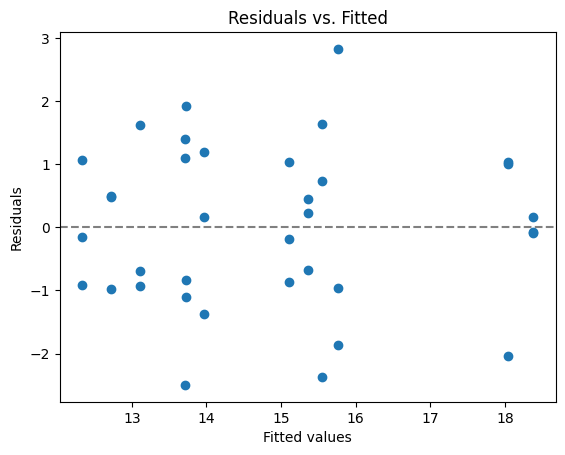

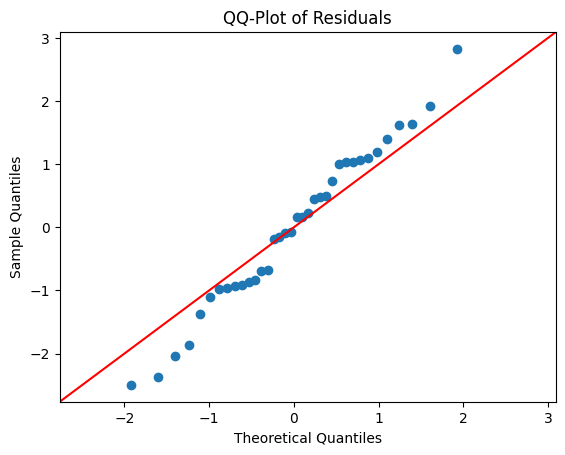

In [8]:
resid = model_full.resid
fitted = model_full.fittedvalues

sw_stat, sw_p = stats.shapiro(resid)
print(f"Shapiro-Wilk p = {sw_p:.3f}")

bp_test = het_breuschpagan(resid, model_full.model.exog)
bp_p = bp_test[3]
print(f"Breusch-Pagan p = {bp_p:.3f}")

plt.scatter(fitted, resid)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()

sm.qqplot(resid, line='45')
plt.title("QQ‐Plot of Residuals")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_10192\2168065187.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = subset.groupby('OT')['y'].mean()


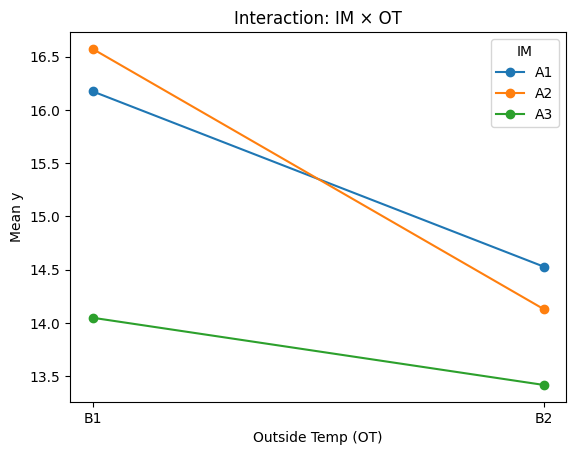

C:\Users\User\AppData\Local\Temp\ipykernel_10192\2168065187.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  m = sub[sub.IM == lvl].groupby('OT')['y'].mean()


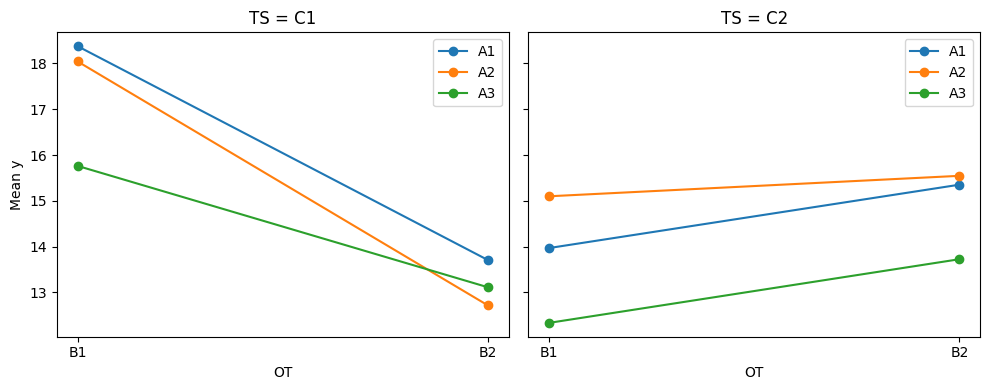

In [5]:
import itertools

fig, ax = plt.subplots()
for lvl in data.IM.cat.categories:
    subset = data[data.IM == lvl]
    means = subset.groupby('OT')['y'].mean()
    ax.plot(means.index, means.values, marker='o', label=lvl)
ax.set_xlabel("Outside Temp (OT)")
ax.set_ylabel("Mean y")
ax.set_title("Interaction: IM × OT")
ax.legend(title="IM")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10,4), sharey=True)
for ax, ts_level in zip(axes, data.TS.cat.categories):
    sub = data[data.TS == ts_level]
    for lvl in data.IM.cat.categories:
        m = sub[sub.IM == lvl].groupby('OT')['y'].mean()
        ax.plot(m.index, m.values, marker='o', label=lvl)
    ax.set_title(f"TS = {ts_level}")
    ax.set_xlabel("OT")
    if ax is axes[0]:
        ax.set_ylabel("Mean y")
    ax.legend()
plt.tight_layout()
plt.show()


In [6]:
model_red = ols('y ~ IM + OT + TS', data=data).fit()

comp = anova_lm(model_red, model_full)
print(comp)


   df_resid         ssr  df_diff    ss_diff         F    Pr(>F)
0      31.0  129.139378      0.0        NaN       NaN       NaN
1      24.0   55.905467      7.0  73.233911  4.491291  0.002558
